Network Science HW2 Problem 2

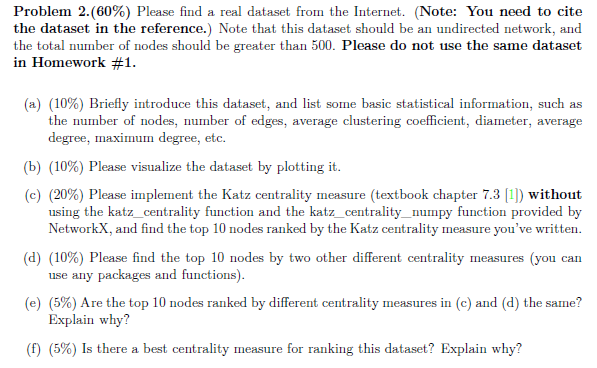

(a) Brief dataset introduction:

This dataset consists of ’circles’ (or ’friends lists’) from Facebook.
Facebook data was collected from survey participants using this Facebook app.
The dataset includes node features (profiles), circles, and ego networks.
Reference link: https://snap.stanford.edu/data/ego-Facebook.html

(b), (c), (d)

Number of nodes: 4039
Number of edges: 88234
Average Clustering Coefficient: 0.6055467186200862
Diameter: 8
Average Degree: 43.69101262688784
Maximum Degree: 1045


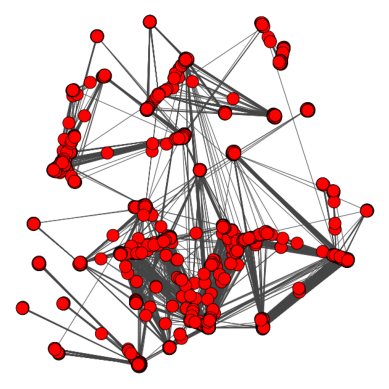

Top 10 nodes (katz centrality): ['108', '1913', '1685', '3438', '1', '2544', '2348', '1889', '1801', '2267']
Top 10 nodes (pagerank): ['3438', '108', '1685', '1', '1913', '349', '687', '3981', '415', '484']
Top 10 nodes (betweenness): ['108', '1685', '3438', '1913', '1086', '1', '699', '568', '59', '429']


In [1]:
from igraph import Graph, plot
import numpy as np
import math
import matplotlib.pyplot as plt

# graph file path
txt_file = "facebook_combined.txt"

# obtain edge list
g_igraph = Graph.Read_Edgelist(txt_file, directed=False)

# method 1: iteration
# def katz(G, alpha=0.001, beta=1, max_iterations=10):
#     n = G.vcount()
#     A = np.array(G.get_adjacency().data)
#     centrality = np.ones(n)
#     for i in range(max_iterations):
#         centrality_new = np.dot(A, centrality) * alpha + beta
#         centrality = centrality_new
#     # normalize
#     norm = np.linalg.norm(centrality)
#     katz_cent = centrality / norm
#     return katz_cent

# method 2: find the inverse
def katz(G, alpha=0.001, beta=1):
    n = G.vcount()
    A = np.array(G.get_adjacency().data)
    I = np.eye(n)
    allone = np.ones(n) 
    centrality = np.dot(np.linalg.inv(I - alpha * A), allone)
    # normalize
    norm = np.linalg.norm(centrality)
    katz_cent = centrality / norm
    return katz_cent

# method 3: use taylor series
# def katz(G, alpha=0.001, beta=1):
#     n = G.vcount()
#     A = np.array(G.get_adjacency().data)
#     I = np.eye(n)
#     allone = np.ones(n) 
#     centrality = np.dot(np.divide(1,(1-alpha*A)), allone)
#     # normalize
#     norm = np.linalg.norm(centrality)
#     katz_cent = centrality / norm
#     return katz_cent

n = g_igraph.vcount()
print("Number of nodes:", n)
m = g_igraph.ecount()
print("Number of edges:", m)
transitivity = np.mean(g_igraph.transitivity_local_undirected(mode="zero"))
print("Average Clustering Coefficient:", transitivity)
dia = g_igraph.diameter()
print("Diameter:", dia)
mean_deg = sum(g_igraph.degree()) / n
print("Average Degree:", mean_deg)
max_deg = max(g_igraph.degree())
print("Maximum Degree:", max_deg)

layout = g_igraph.layout("auto") 
plot(g_igraph, layout=layout, target="my_graph.png")
plt.imshow(plt.imread("my_graph.png"))
plt.axis('off')
plt.show()

# find the range of alpha
# A = np.array(g_igraph.get_adjacency().data)
# eigenvalues = np.linalg.eigvals(A)
# max_e_inv = 1 / max(np.abs(eigenvalues))
# print(max_e_inv) # ~=0.006, therefore alpha is in the range of [0,0.006)

res = katz(g_igraph)
res1 = {str(idx + 1): res[idx] for idx in range(len(res))}
top_10_nodes_katz = sorted(res1, key=res1.get, reverse=True)[:10]
print("Top 10 nodes (katz centrality):", top_10_nodes_katz)

pg_res = g_igraph.pagerank()
res2 = {str(idx + 1): pg_res[idx] for idx in range(len(pg_res))}
top_10_nodes_pagerank = sorted(res2, key=res2.get, reverse=True)[:10]
print("Top 10 nodes (pagerank):", top_10_nodes_pagerank)

bn_res = g_igraph.betweenness()
res3 = {str(idx + 1): bn_res[idx] for idx in range(len(bn_res))}
top_10_nodes_bn = sorted(res3, key=res3.get, reverse=True)[:10]
print("Top 10 nodes (betweenness):", top_10_nodes_bn)

(e) Are the top 10 nodes ranked by different centrality measures in (c) and (d) the same?
Explain why?

First of all, the calculation methods for Katz centrality, PageRank, and Betweenness centrality
are different. In addition, in part (c), we applied three different methods to simulate Katz
centrality and discovered that the results of method three slightly differed from those of methods
one and two. Therefore, it becomes evident that even when employing the same theorem but
different solution approaches, the results can still vary. This is not to mention comparing the
results between simulation and using inbuilt functions in libraries like igraph or networkx. Lastly,
these three centrality measures are employed in different scenarios. Katz centrality is used to
enhance eigenvector centrality by introducing the parameter ”beta.” PageRank focuses on the
concept that centrality derived from network neighbors is proportional to their centrality divided
by their out-degree, whereas Betweenness centrality is an entirely different concept, emphasizing
the paths between vertices.

(f) Is there a best centrality measure for ranking this dataset? Explain why?

Yes, there is.

In my opinion, I think Katz centrality is the best measure to rank this dataset. Because having
many Facebook friends doesn’t mean greater influence, as it also depends on the influence of
the friends themselves. Katz centrality can help solve problems where everyone has a centrality
score of 0, thus improving upon eigenvector centrality. Therefore, I believe Katz centrality is
the best choice.